In [1]:
from agents.matchmanager import MatchManager,buildMatchManager
from itertools import product
from agents import GreedyAgent, AlphaBetaAgent, RandomAgent
from scenarios import scenarioJunction, scenarioJunctionExo, scenarioTest1v1, scenarioTest2v2
from core.const import RED, BLUE
from agents.ml.simple import SimpleMLAgent
from agents.ml.regressor import RegressorAgent
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
import random
from sklearn.ensemble import ExtraTreesClassifier
import logging


In [2]:
dfs=[]
for i in range(3):
    board, state = scenarioJunction()
    playerRed = RegressorAgent(RED, {'scenario': board.name, 'model': 'RandomForestRegressor','color':'red'})
    playerBlue = RegressorAgent(BLUE, {'scenario': board.name, 'model': 'RandomForestRegressor','color':'blue'})
    mm = MatchManager(' ', playerRed, playerBlue, board, state, seed=50+i)
    while not mm.end:
        mm.nextStep()
    df_blue=playerBlue.createDf(i)
    df_red=playerRed.createDf(i)
    win_blue = [mm.winner] * len(df_blue)
    win_red = [mm.winner] * len(df_red)
    df_blue['winner']=win_blue
    df_red['winner']=win_red
    dfs.append(df_blue)
    dfs.append(df_red)
df=pd.concat(dfs)
    

In [ ]:
df_group=df.groupby(['Agente','Numero Partita'])


In [ ]:
list(df_group.groups)

array([<AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>,
       <AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>,
       <AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>],
      dtype=object)

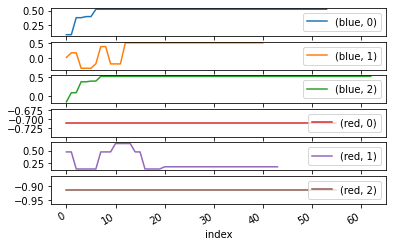

In [3]:
pd.pivot_table(df.reset_index(),
               index='index', columns=['Agente','Numero Partita'], values='Score'
              ).plot(subplots=True)

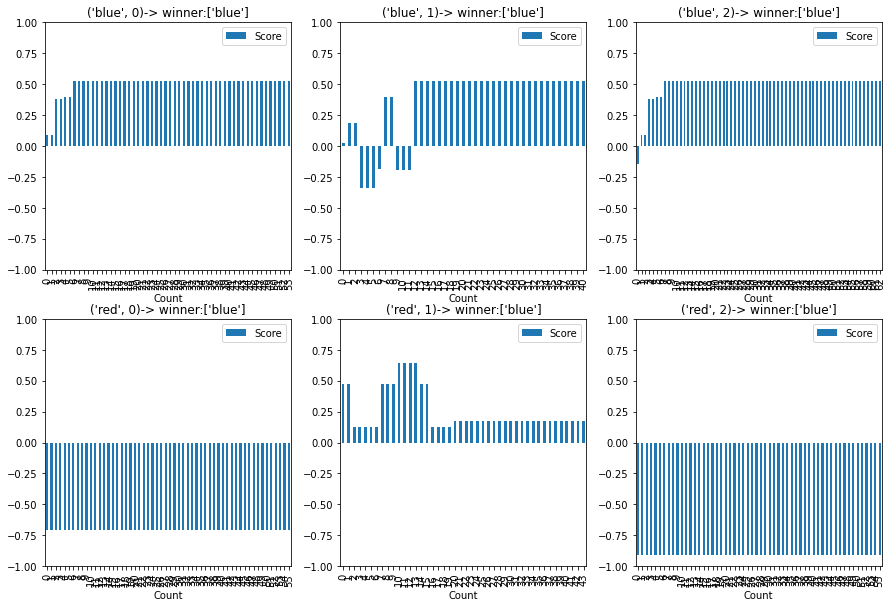

In [86]:
import matplotlib.pyplot as plt

%matplotlib inline


fig, axes = plt.subplots(len(df['Agente'].unique()),len(df['Numero Partita'].unique()), figsize=(15,10))
for (year, group), ax in zip(df.groupby(['Agente','Numero Partita']), axes.flatten()):
    win=group['winner'].unique()
    title=f'{year}-> winner:{win}'
    group.plot(x='Count', y='Score', kind='bar', ax=ax,title=title,ylim=[-1,1])

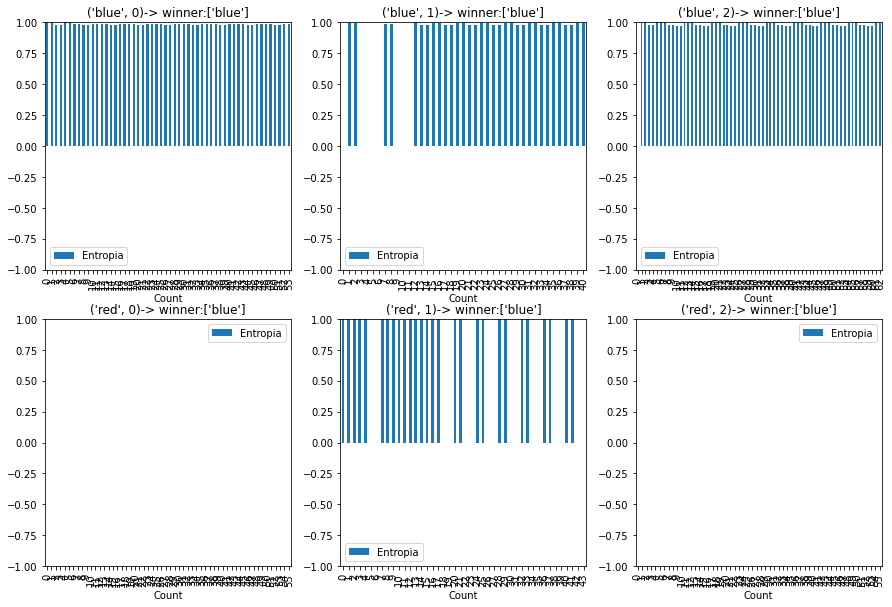

In [26]:
import matplotlib.pyplot as plt

%matplotlib inline


fig, axes = plt.subplots(len(df['Agente'].unique()),3, figsize=(15,10))
for (year, group), ax in zip(df.groupby(['Agente','Numero Partita']), axes.flatten()):
    win=group['winner'].unique()
    title=f'{year}-> winner:{win}'
    group.plot(x='Count', y='Entropia', kind='bar', ax=ax,title=title,ylim=[-1,1])

In [ ]:
plot=df.groupby(['Agente','Numero Partita']).plot(kind='bar',y='Score',x='Count',ylim=[-1,1])

In [ ]:
plot=df.groupby(['Agente','Numero Partita']).plot.bar(y='Entropia')

In [ ]:
df_i=df.reset_index()

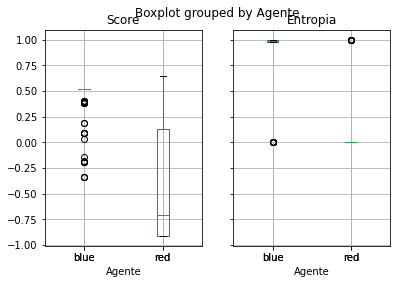

In [27]:
boxplot=df.boxplot(column=['Score', 'Entropia'],by='Agente')


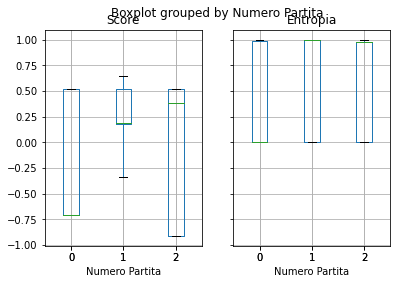

In [29]:
boxplot=df.boxplot(column=['Score', 'Entropia'],by='Numero Partita')

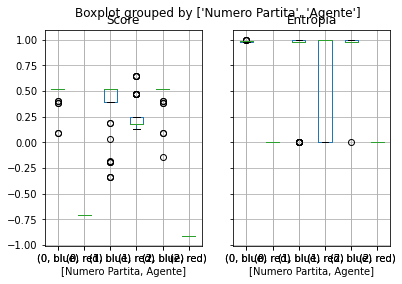

In [30]:
boxplot=df.boxplot(column=['Score', 'Entropia'],by=['Numero Partita','Agente'])

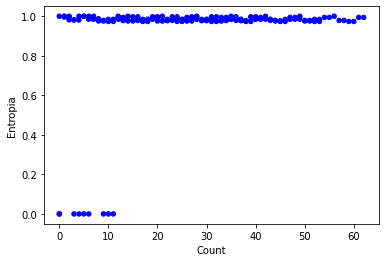

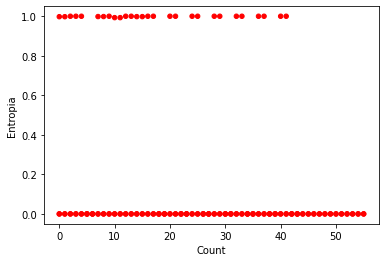

In [33]:
plot=df.groupby('Agente').plot.scatter(x='Count',y='Entropia',c='Agente')

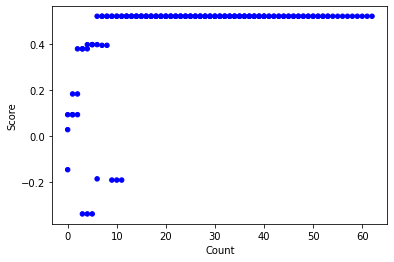

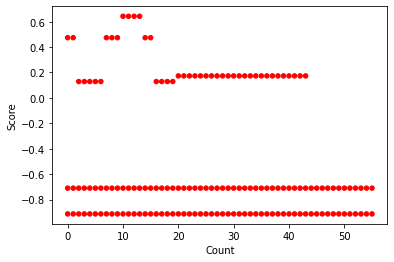

In [36]:
plot=df.groupby('Agente').plot.scatter(x='Count',y='Score',c='Agente')

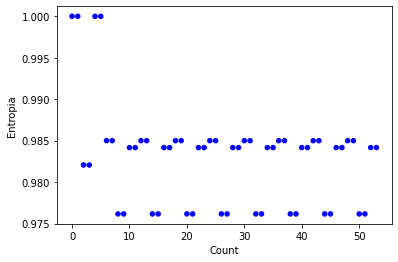

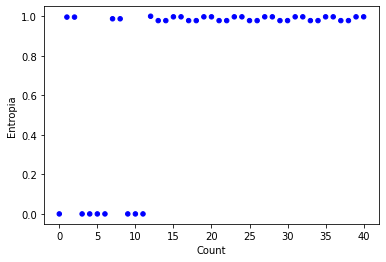

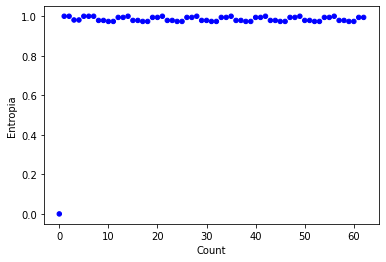

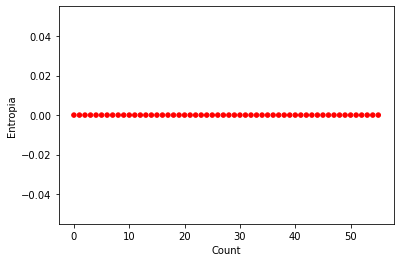

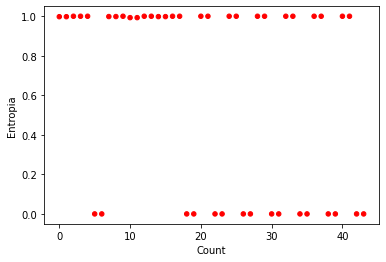

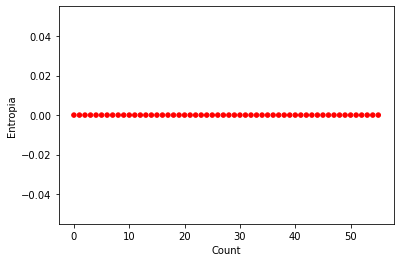

In [34]:
plot=df.groupby(['Agente','Numero Partita']).plot.scatter(x='Count',y='Entropia',c='Agente')

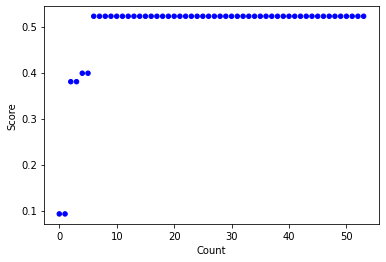

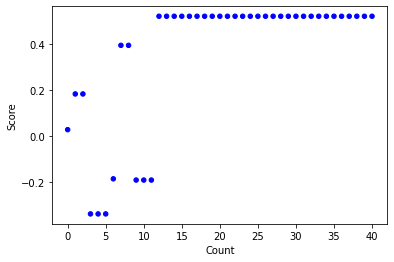

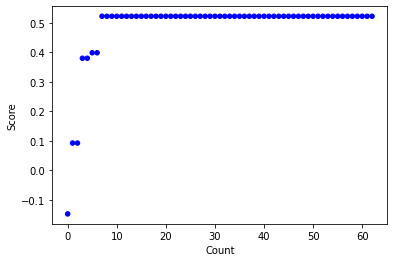

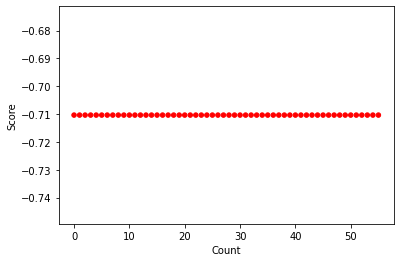

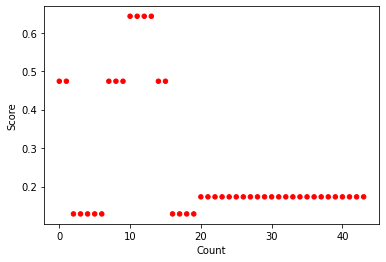

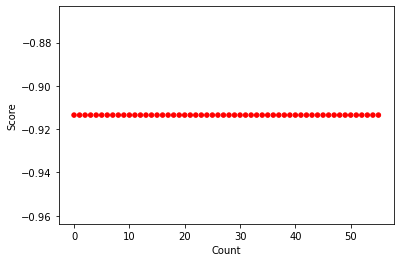

In [35]:
plot=df.groupby(['Agente','Numero Partita']).plot.scatter(x='Count',y='Score',c='Agente')

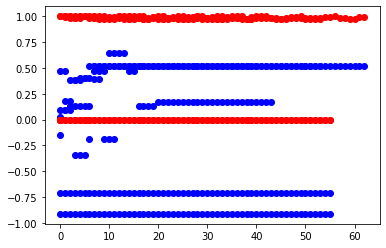

In [50]:
ax = plt.gca()

ax.scatter(y=df['Score'], x=df['Count'], color="b")
ax.scatter(y=df['Entropia'], x=df['Count'], color="r")


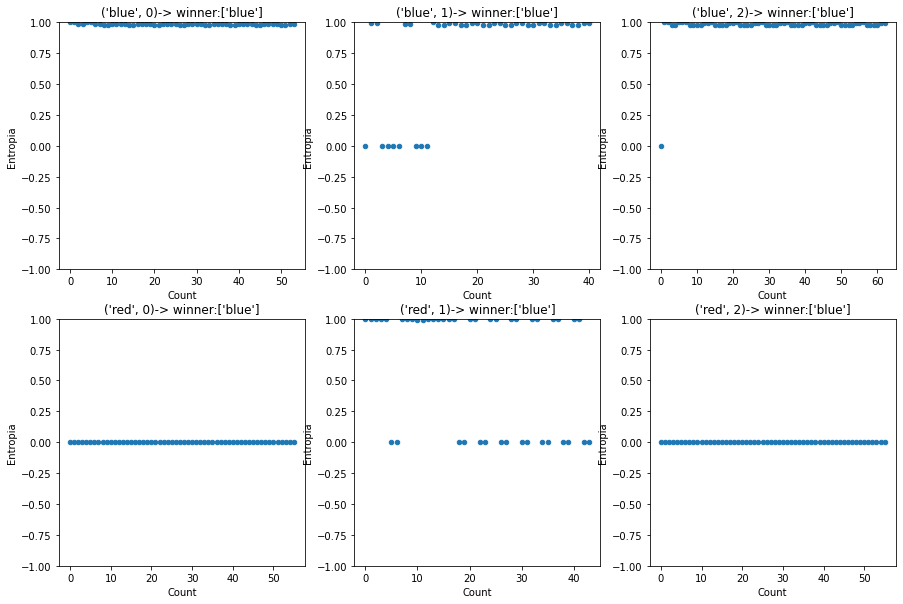

In [51]:
import matplotlib.pyplot as plt

%matplotlib inline


fig, axes = plt.subplots(len(df['Agente'].unique()),3, figsize=(15,10))
for (year, group), ax in zip(df.groupby(['Agente','Numero Partita']), axes.flatten()):
    win=group['winner'].unique()
    title=f'{year}-> winner:{win}'
    group.plot(x='Count', y='Entropia', kind='bar', ax=ax,title=title,ylim=[-1,1])

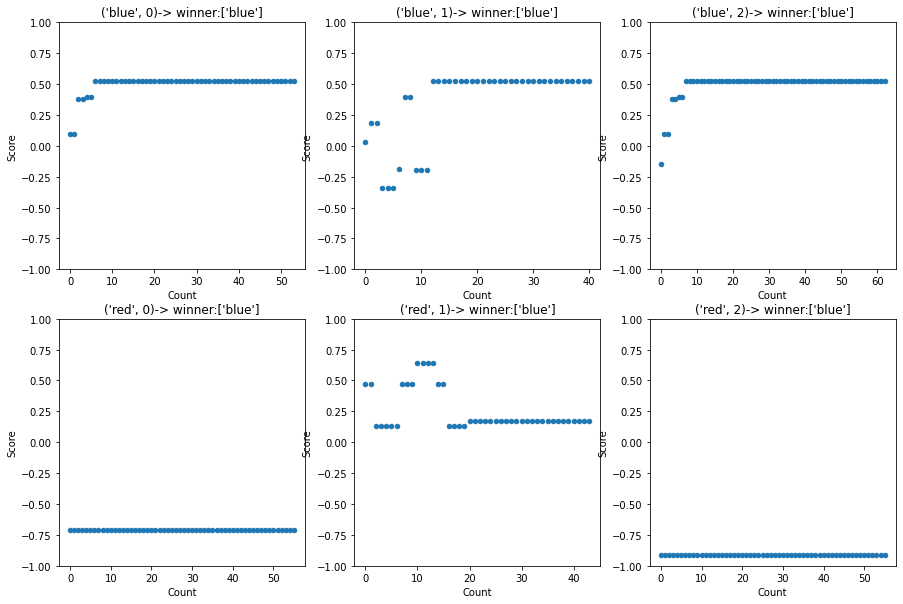

In [54]:
import matplotlib.pyplot as plt

%matplotlib inline


fig, axes = plt.subplots(len(df['Agente'].unique()),3, figsize=(15,10))
for (year, group), ax in zip(df.groupby(['Agente','Numero Partita']), axes.flatten()):
    win=group['winner'].unique()
    title=f'{year}-> winner:{win}'
    group.plot(x='Count', y='Score', kind='scatter', ax=ax,title=title,ylim=[-1,1])

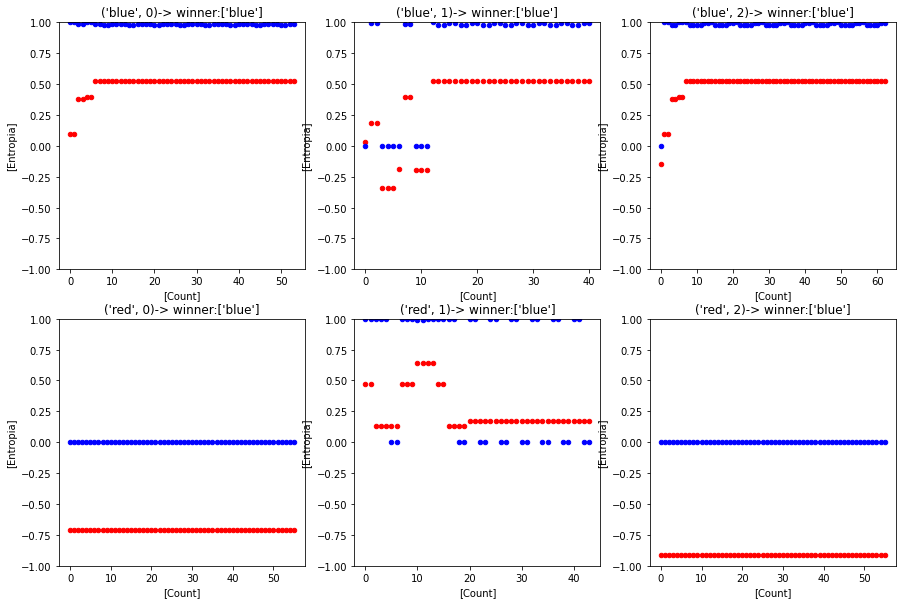

In [67]:
import matplotlib.pyplot as plt

%matplotlib inline


fig, axes = plt.subplots(len(df['Agente'].unique()),3, figsize=(15,10))
for (year, group), ax in zip(df.groupby(['Agente','Numero Partita']), axes.flatten()):
    win=group['winner'].unique()
    title=f'{year}-> winner:{win}'
    group.plot(x=['Count'], y=['Score'], kind='scatter', ax=ax,title=title,ylim=[-1,1],color='r')
    group.plot(x=['Count'], y=['Entropia'], kind='scatter', ax=ax,title=title,ylim=[-1,1],color='b')

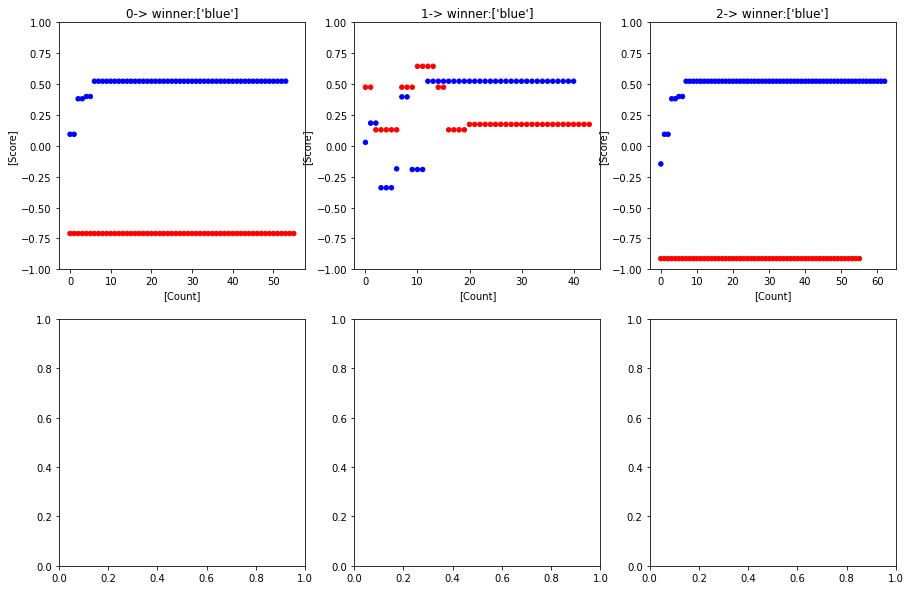

In [75]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, axes = plt.subplots(len(df['Agente'].unique()),3, figsize=(15,10))
for (year, group), ax in zip(df.groupby(['Numero Partita']), axes.flatten()):
    win=group['winner'].unique()
    title=f'{year}-> winner:{win}'
    group.plot(x=['Count'], y=['Score'], kind='scatter', ax=ax,title=title,ylim=[-1,1],c='Agente')


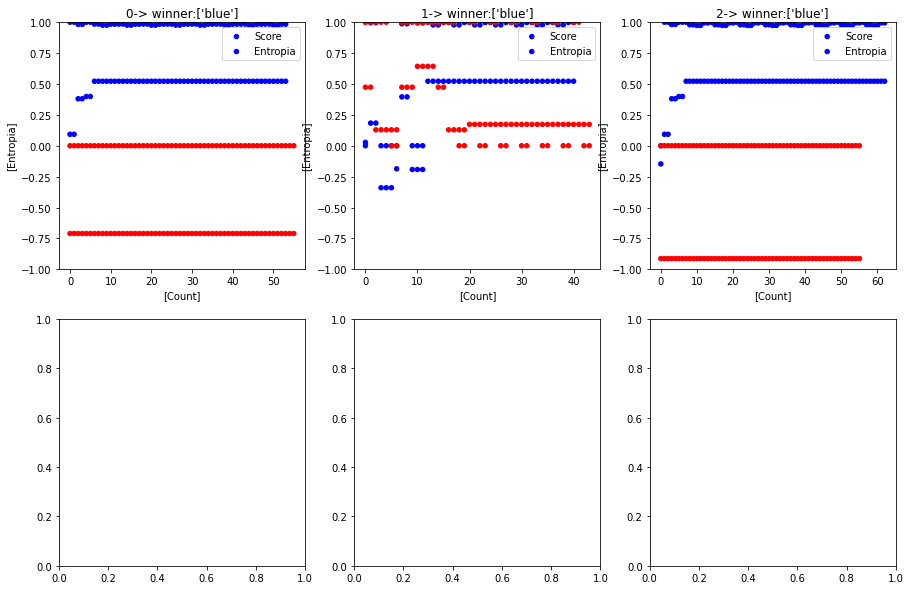

In [73]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, axes = plt.subplots(len(df['Agente'].unique()),3, figsize=(15,10))
for (year, group), ax in zip(df.groupby(['Numero Partita']), axes.flatten()):
    win=group['winner'].unique()
    title=f'{year}-> winner:{win}'
    group.plot(x=['Count'], y=['Score'], kind='scatter', ax=ax,title=title,ylim=[-1,1],c='Agente')
    group.plot(x=['Count'], y=['Entropia'], kind='scatter', ax=ax,title=title,ylim=[-1,1],c='Agente')

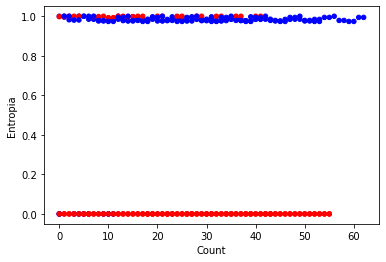

In [79]:
plot=df.plot.scatter(x='Count',y='Entropia',c='Agente')

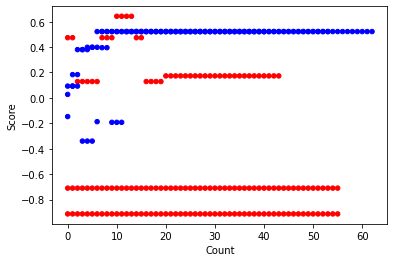

In [80]:
plot=df.plot.scatter(x='Count',y='Score',c='Agente')

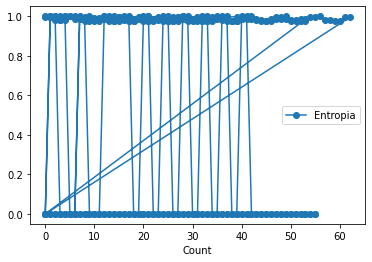

In [81]:
plot=df.plot.line(x='Count',y='Entropia',style='-o')

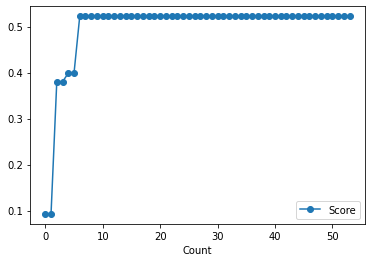

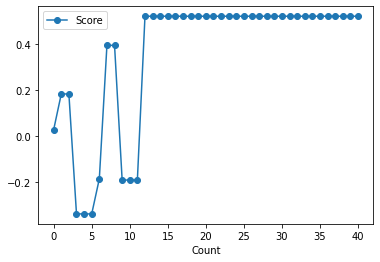

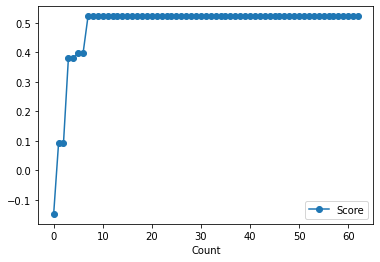

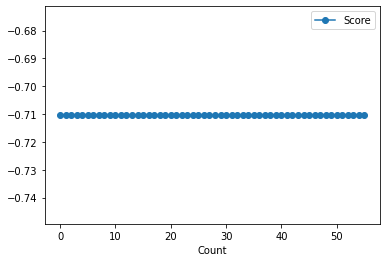

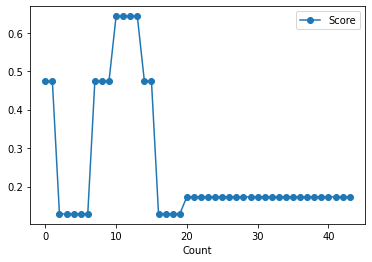

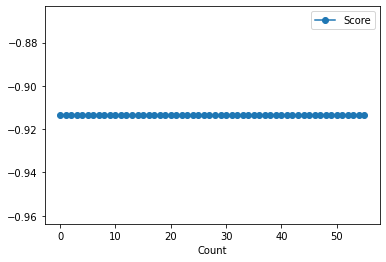

In [83]:
plot=df.groupby(['Agente','Numero Partita']).plot.line(x='Count',y='Score',style='-o')

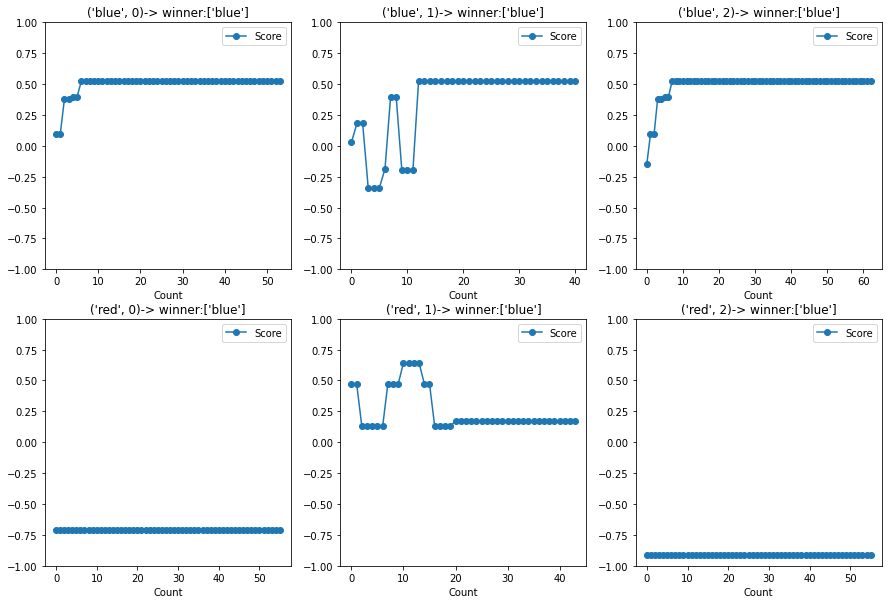

In [85]:
import matplotlib.pyplot as plt

%matplotlib inline


fig, axes = plt.subplots(len(df['Agente'].unique()),3, figsize=(15,10))
for (year, group), ax in zip(df.groupby(['Agente','Numero Partita']), axes.flatten()):
    win=group['winner'].unique()
    title=f'{year}-> winner:{win}'
    group.plot(x='Count', y='Score', kind='line',style='-o', ax=ax,title=title,ylim=[-1,1])